# Behavioral Cloning Project
---

In [1]:
%matplotlib inline
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from model import BehavioralDCNN
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from utils import data_generator

/home/bryce/anaconda3/envs/carnd-term1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


---

## Import DCNN Model

In [2]:
bcnn = BehavioralDCNN()
bcnn.draw_model('model_architecture.png') # Save for display in README.md file
steering_model = bcnn.model
steering_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 160, 320, 3)       0         
_________________________________________________________________
Normalization (Lambda)       (None, 160, 320, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 78, 158, 24)       1824      
_________________________________________________________________
conv2 (Conv2D)               (None, 37, 77, 36)        21636     
_________________________________________________________________
conv3 (Conv2D)               (None, 17, 37, 48)        43248     
_________________________________________________________________
conv4 (Conv2D)               (None, 15, 35, 64)        27712     
_________________________________________________________________
conv5 (Conv2D)               (None, 13, 33, 64)        36928     
__________

In [3]:
early_stopping = EarlyStopping(min_delta=0.0025, patience=2)
steering_model.compile(optimizer='adam', loss='mse')

---

## Data Preprocessing

In [4]:
col_names = ['Center', 'Left', 'Right', 'Steering Angle', 'Throttle', 'Break', 'Speed']
driving_log_df = pd.read_csv('data/driving_log.csv', index_col=False, names=col_names)
driving_log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25621 entries, 0 to 25620
Data columns (total 7 columns):
Center            25621 non-null object
Left              25621 non-null object
Right             25621 non-null object
Steering Angle    25621 non-null float64
Throttle          25621 non-null float64
Break             25621 non-null float64
Speed             25621 non-null float64
dtypes: float64(4), object(3)
memory usage: 1.4+ MB


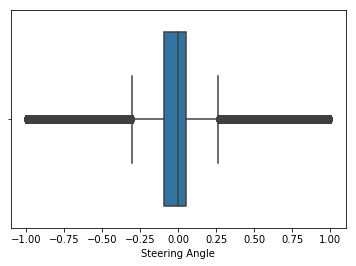

In [5]:
sns.boxplot(driving_log_df['Steering Angle'])

In [6]:
driving_log_df['Steering Angle'].describe()

count    25621.000000
mean         0.003964
std          0.355503
min         -1.000000
25%         -0.090559
50%          0.000000
75%          0.050000
max          1.000000
Name: Steering Angle, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(driving_log_df[['Center', 'Left', 'Right']],
                                                    driving_log_df['Steering Angle'], test_size=0.2)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20496 entries, 7957 to 17603
Data columns (total 3 columns):
Center    20496 non-null object
Left      20496 non-null object
Right     20496 non-null object
dtypes: object(3)
memory usage: 640.5+ KB


In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5125 entries, 3242 to 72
Data columns (total 3 columns):
Center    5125 non-null object
Left      5125 non-null object
Right     5125 non-null object
dtypes: object(3)
memory usage: 160.2+ KB


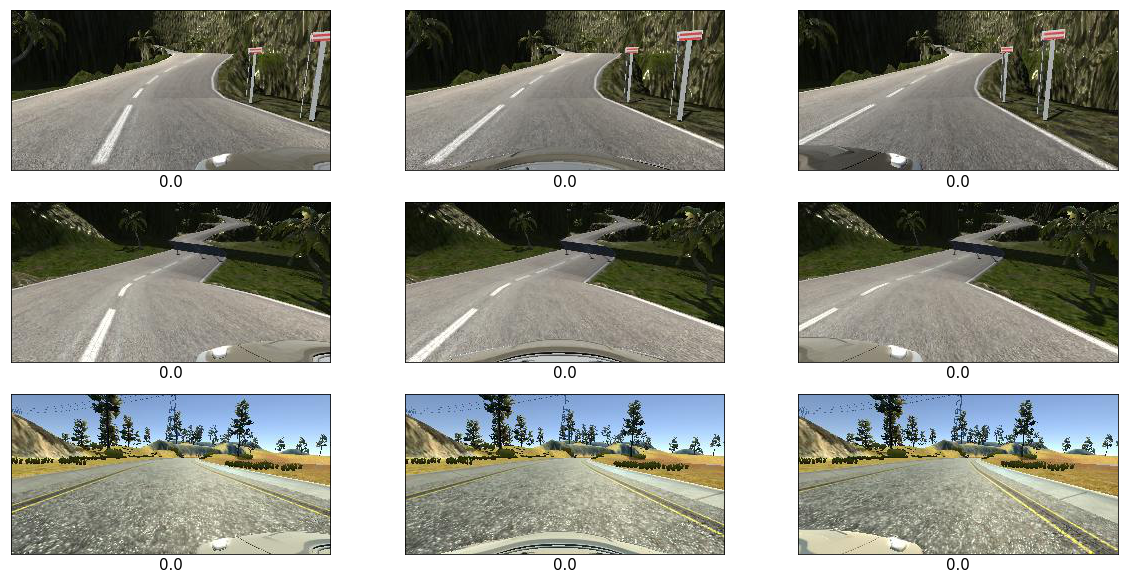

In [10]:
random_indices = np.random.randint(0, X_train.shape[0], size=3)
plt.figure(figsize=(20,10))
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')

random_indices = np.random.randint(0, X_train.shape[0], size=3)
i = 0
for index in random_indices:
    i += 1
    plt.subplot(3, 3, i)
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    plt.xlabel(y_train.iloc[index], color='black', fontsize=15)
    plt.imshow(plt.imread(X_train['Left'].iloc[index]))
    
    i += 1
    plt.subplot(3, 3, i)
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    plt.xlabel(y_train.iloc[index], color='black', fontsize=15)
    plt.imshow(plt.imread(X_train['Center'].iloc[index]))
    
    i += 1
    plt.subplot(3, 3, i)
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    plt.xlabel(y_train.iloc[index], color='black', fontsize=15)
    plt.imshow(plt.imread(X_train['Right'].iloc[index]))

---

## Model Training & Saving

In [11]:
steering_model.fit_generator(data_generator(X_train, y_train), steps_per_epoch=401, epochs=3,
                             verbose=1, callbacks=[early_stopping],
                             validation_data=data_generator(X_test, y_test, is_training=False), validation_steps=81,
                             max_queue_size=10)
steering_model.save('model.h5')

Epoch 1/3
401/401 [==============================] - 547s 1s/step - loss: 0.0841 - val_loss: 0.0479
Epoch 2/3
401/401 [==============================] - 543s 1s/step - loss: 0.0520 - val_loss: 0.0427
Epoch 3/3
401/401 [==============================] - 567s 1s/step - loss: 0.0471 - val_loss: 0.0405
